In [3]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data=read_csv("/content/drive/My Drive/dataset/info_perjalanan.csv")
print(data)

          tgl_waktu  jarak (km)  durasi (menit)  harga  driverrating  \
0    1/1/2016 21:17         5.1              18  22000           4.8   
1     1/2/2016 1:37         5.0              15  20000           4.7   
2    1/2/2016 20:38         4.8              17  19200           4.7   
3    1/6/2016 17:19         4.7              16  18800           5.0   
4    1/7/2016 13:33         7.0              21  28000           4.6   
5    1/10/2016 8:25         0.8               3   3200           5.0   
6   1/10/2016 12:44        16.5              48  66000           4.3   
7   1/10/2016 19:32         7.5              23  30000           4.9   
8    1/11/2016 9:21         6.2              20  24800           4.8   
9   1/11/2016 12:03         6.4              24  25600           4.7   
10  1/12/2016 15:28         1.7               6   6800           5.0   
11  1/12/2016 15:54         1.6               5   6400           5.0   
12  1/13/2016 14:07         1.9               8   7600          

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tgl_waktu       24 non-null     object 
 1   jarak (km)      24 non-null     float64
 2   durasi (menit)  24 non-null     int64  
 3   harga           24 non-null     int64  
 4   driverrating    24 non-null     float64
 5   cust_rating     24 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
def plot_counts(ax):
  for c in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

    ax.bar_label(c, labels=labels, label_type = 'center', fontsize=8)
  plt.ylabel('Count')
  plt.show()

  plt.rcParams["figure.figsize"]=(12,6)

  ax = data.groupby('driverrating') ['jarak (km)'].count().reset_index().plot(
      kind='bar', stacked=False, x='driverrating', color='plum', legend=False)

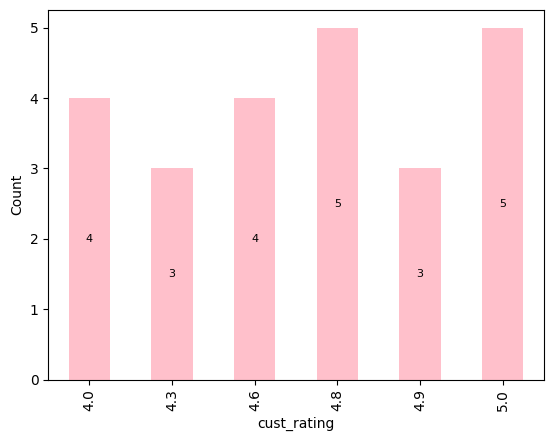

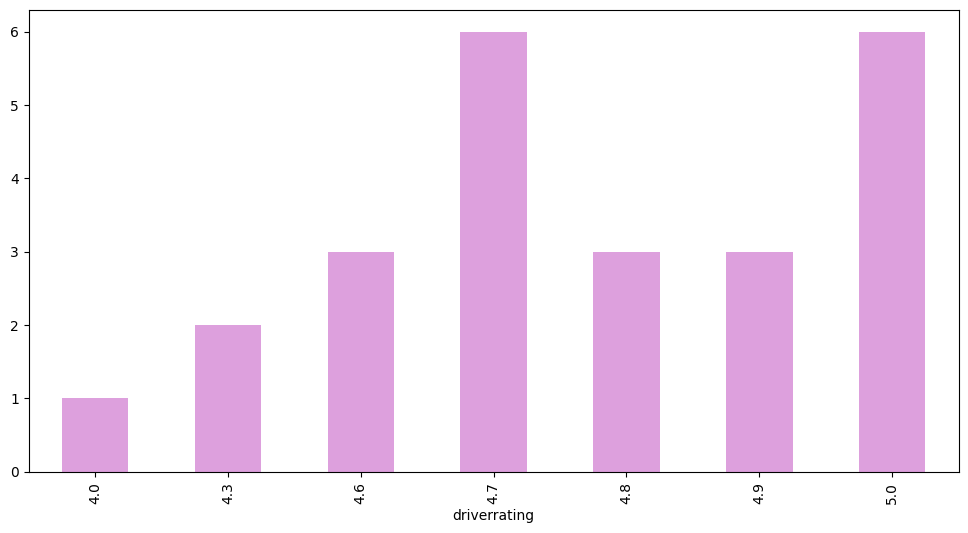

In [10]:
ax = data.groupby('cust_rating')['harga'].count().reset_index().plot(
    kind='bar', stacked = False, x='cust_rating', color='pink', legend = False)
plot_counts(ax)

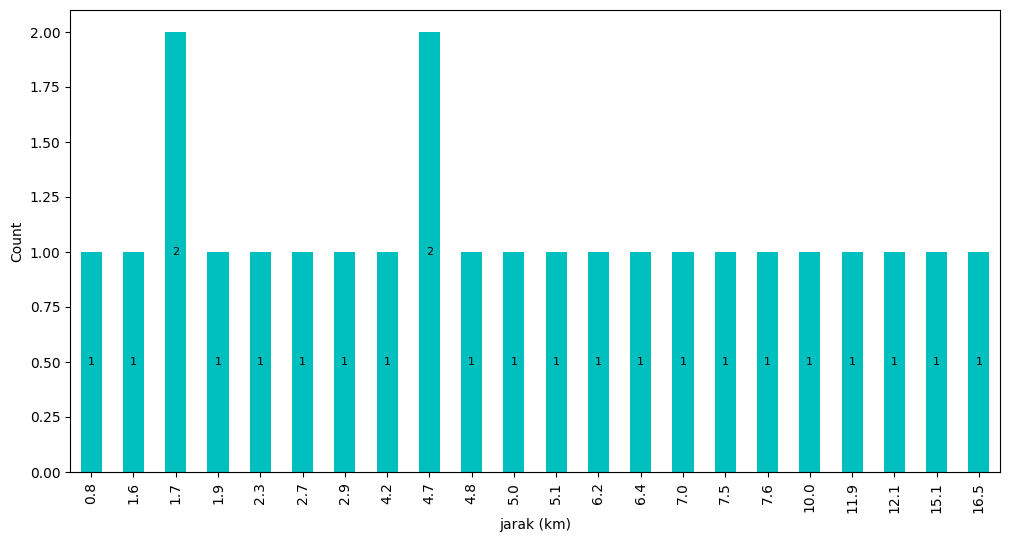

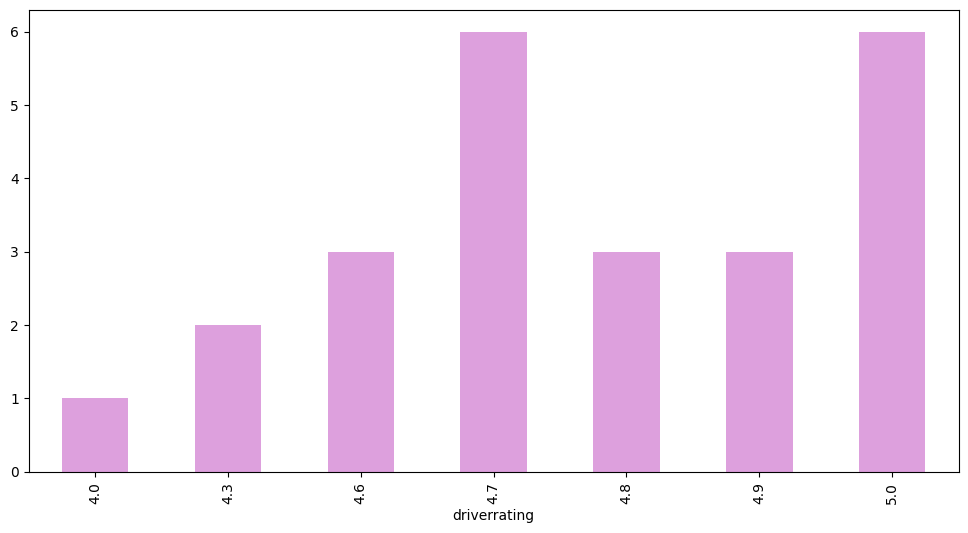

In [13]:
ax = data.groupby('jarak (km)')['durasi (menit)'].count().reset_index().plot(
    kind='bar', stacked = False, x='jarak (km)', color='c', legend = False)
plot_counts(ax)

In [22]:
first_option_data = data [(data['jarak (km)'] >= 5) & (data['durasi (menit)'] >= 10) &
                          (data['harga'] >= 10000) & (data['driverrating'] >= 4.7)]
first_option_data.head()

,tgl_waktu,jarak (km),durasi (menit),harga,driverrating,cust_rating
0,1/1/2016 21:17,5.1,18,22000,4.8,4.0
1,1/2/2016 1:37,5.0,15,20000,4.7,5.0
7,1/10/2016 19:32,7.5,23,30000,4.9,4.0
8,1/11/2016 9:21,6.2,20,24800,4.8,4.8
9,1/11/2016 12:03,6.4,24,25600,4.7,5.0
